In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random, seed

# Exercises

This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video example on 2D array slicing.

## Exercise 1
Use the above function to write code for a single random walker in 1-D.

 1. [2] Plot to the screen a random walk for 1000 steps, i.e. plot out the steps (position $x$ plotted
against step number $i$).
 2. [2] Plot out as above, but this time for 100 such walks (all displayed on the same
graph). You should do this simply by writing a loop.



In [2]:
def walk(steps):
    '''
    steps is the length of the 1-D random walk vector returned
    Vectorised method.
    '''
    x = np.random.choice([-1, 1], size=steps) # random -1 or 1
    x = np.cumsum(x) # cumulative sum
    return x

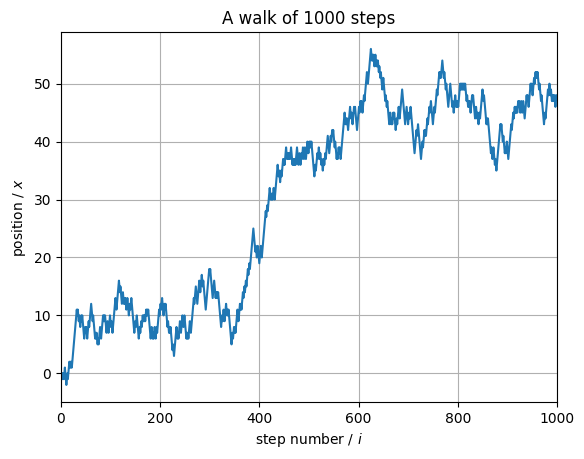

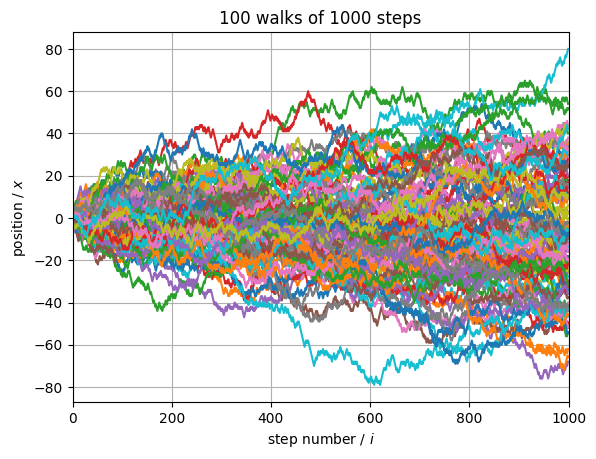

In [8]:
# 1.
# define a single walk of 1000 steps
x = np.linspace(0,999,1000)
y = walk(1000)

# display plot
plt.plot(x, y)
plt.ylabel(r'position / $x$')
plt.xlabel(r'step number / $i$')
plt.title('A walk of 1000 steps')
plt.xlim(0,1000)
plt.grid()
plt.show()

# 2.
# loop 100 times, creating and plotting a walk each time
for i in range (100):
  y = walk(1000)
  plt.plot(x, y, ms=0.25)

# display plot
plt.ylabel(r'position / $x$')
plt.xlabel(r'step number / $i$')
plt.title('100 walks of 1000 steps')
plt.xlim(0,1000)
plt.grid()
plt.show()

## Exercise 2
You will now extend your code to allow for _multiple_ walks in a more systematic way. Do this by defining a 2-D array to contain the trajectories of `N` particles, each taking a number of steps called `steps`, i.e. define an initially empty integer array like this:
```python
particles = np.zeros((steps, N), int)
```
Which you will fill with the `steps` of each `N` particles. You may find [week 6 of PX1224](https://alexandria.astro.cf.ac.uk/Joomla-python/index.php/week-6-two-dimensional-arrays) useful, in particular "2.2. Returning parts of 2-d Arrays".

 1. [2] Calculate and then plot out the steps for 10 walkers to the screen (still use 1000 steps), all on the same plot.
 2. [2] Calculate (plot if you wish) the steps for 500 walkers. We define _for each step_ a "mean position": the average of the positions of all walkers at each step. We also define _for each step_ a "mean squared position": the average of the squares of the positions of all walkers (**not** the square of the average) at each step. Those two quantities, the "mean position" and the "mean squared position" are standard quantities in random walks. Print out the "mean position" and the "mean squared position" of the 500 walkers at the _last_ step.
 3. [4] Calculate the mean position at _each_ step, and plot it.
 4. [4] Calculate the mean squared position of the 500 walkers at _each_ step, and
plot it. What do you notice?



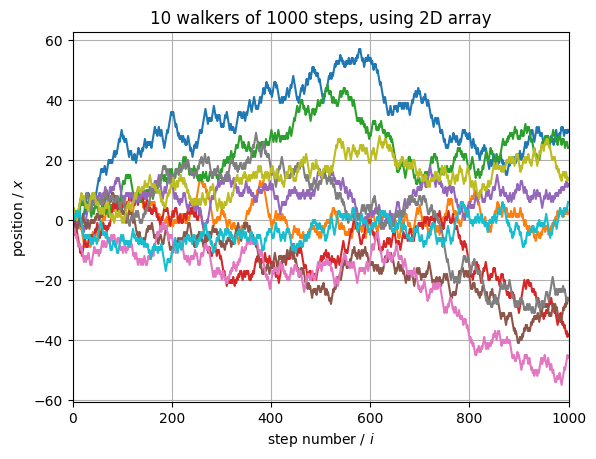


Mean position at last step: -0.528
Mean squared position at last step: 1054.4



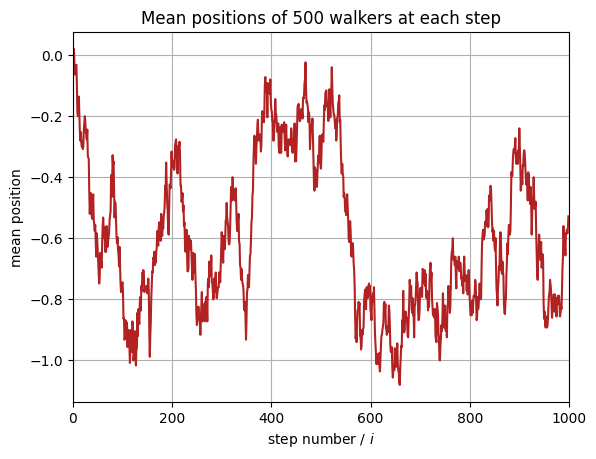

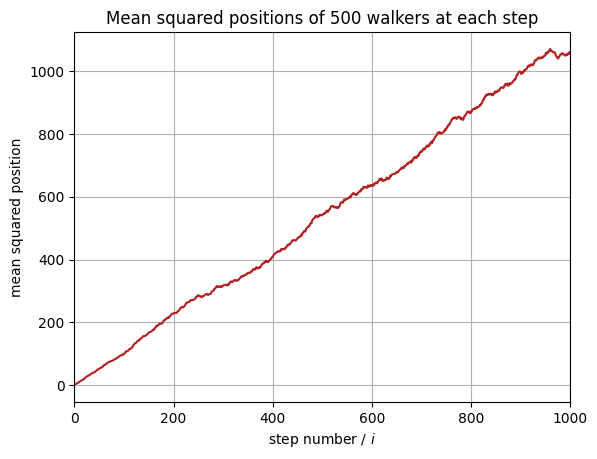

In [9]:
# 1.
steps = 1000
N = 10
particles = np.zeros((steps, N), int)
# loop through particles setting each particles 'walk' to the generated walk
for i in range(N):
  particles[:, i] = walk(steps)
# plot the particles walks against the steps
x = np.linspace(0,999,1000)
plt.plot(x, particles)

# display plot
plt.title('10 walkers of 1000 steps, using 2D array')
plt.ylabel(r'position / $x$')
plt.xlabel(r'step number / $i$')
plt.xlim(0,1000)
plt.grid()
plt.show()

# 2.
# calculating walks for 500 walkers
steps = 1000
N = 500
particles = np.zeros((steps, N), int)
# loop through particles setting each particles 'walk' to the generated walk
for i in range(N):
  particles[:, i] = walk(steps)

# define the mean positions and mean squared positions at each step
mean_pos = np.mean(particles, axis=1)
mean_sq_pos = np.mean(particles**2, axis=1)
print(f'\nMean position at last step: {mean_pos[-1]}\nMean squared position at last step: {mean_sq_pos[-1]}\n')

# 3. mean position calculated before
plt.plot(x, mean_pos, 'firebrick')
plt.title('Mean positions of 500 walkers at each step')
plt.ylabel(r'mean position')
plt.xlabel(r'step number / $i$')
plt.xlim(0,1000)
plt.grid()
plt.show()

# 4. mean squared position calculated before
plt.plot(x, mean_sq_pos, 'firebrick')
plt.title('Mean squared positions of 500 walkers at each step')
plt.ylabel(r'mean squared position')
plt.xlabel(r'step number / $i$')
plt.xlim(0,1000)
plt.grid()
plt.show()


## Exercise 3
Extend the previous exercise by plotting a histogram of particle positions. You will need to decide yourself how best to do this. You will need to use the histogram function `plt.hist`.

 1. [2] Plot a histogram at the _last_ step.
 2. [2] Plot a histogram for intermediate steps of your choice to illustrate how it changes with the number of steps. Each histogram should be saved as an image to that they can easily be viewed afterwards. (If you feel ambitious, you could make an animation, see the solution to the optional question of week 3 for an example how).


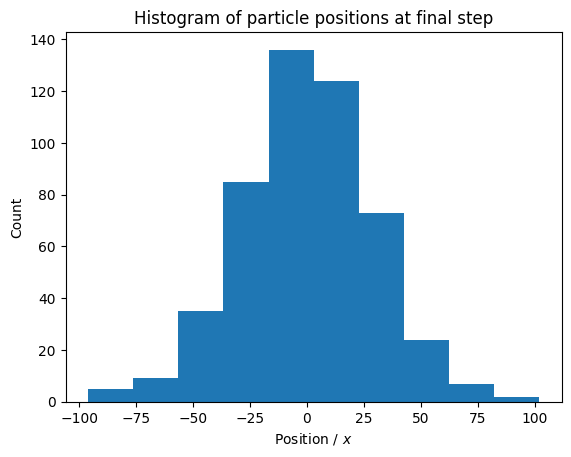

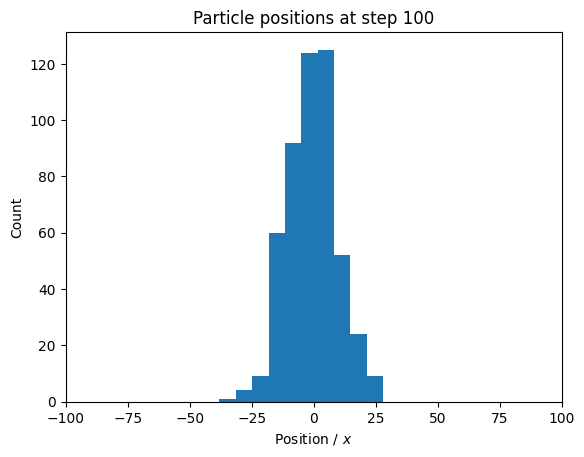

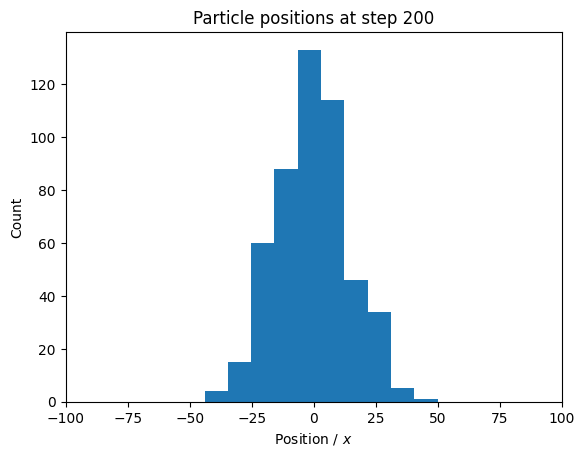

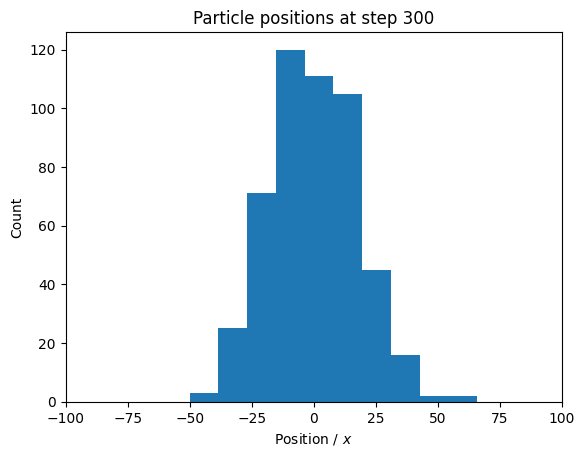

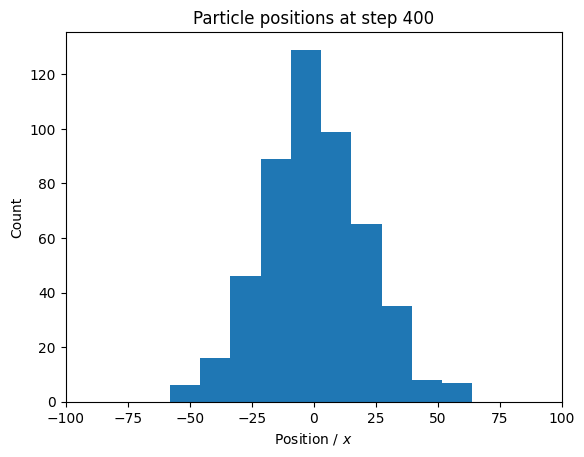

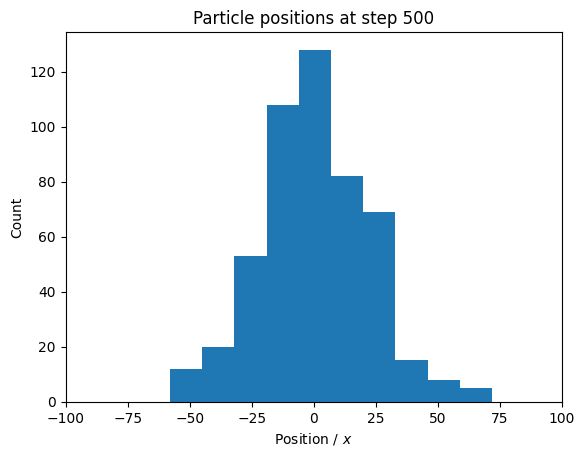

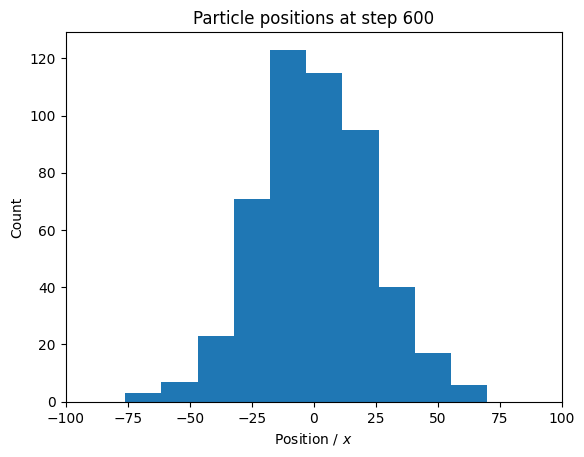

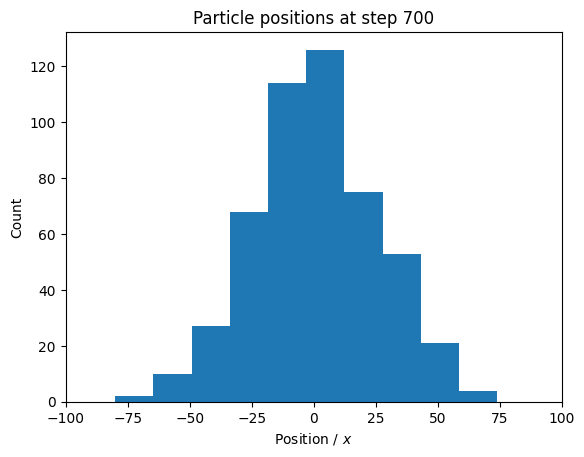

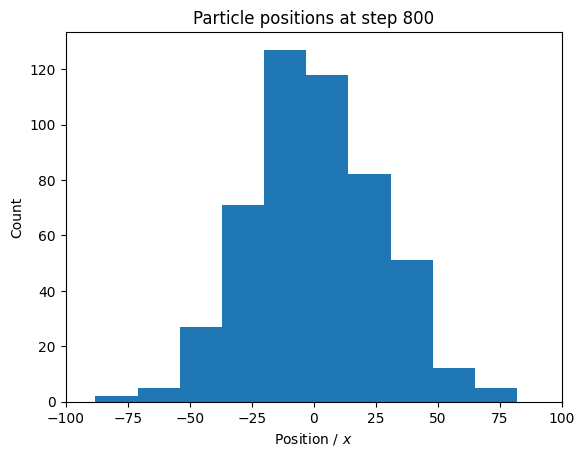

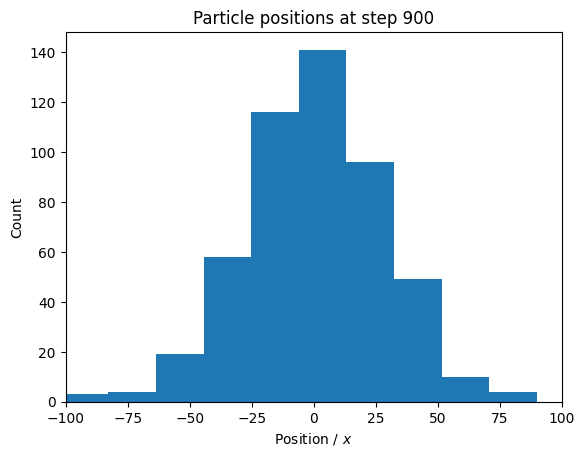

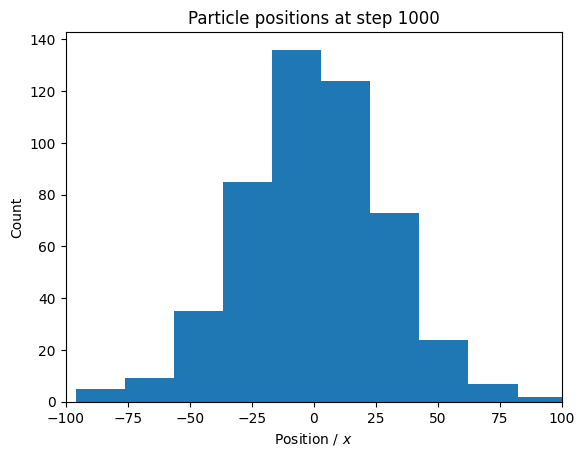

In [5]:
# 1.
plt.hist(particles[-1])
plt.ylabel('Count')
plt.xlabel(r'Position / $x$')
plt.title('Histogram of particle positions at final step')
plt.show()

# 2.
# loop through and make a histogram every 100 steps
for i in range(10):
  step = 99+100*i

  # display each figure
  plt.figure()
  plt.hist(particles[step])
  plt.title(f'Particle positions at step {step+1}')
  plt.ylabel('Count')
  plt.xlabel(r'Position / $x$')
  plt.xlim(-100,100)
  plt.savefig(f'hist_step_{step+1}.png')